## PYRCO MACHINE LEARNING MODEL
GOALS: 
- REDUCE TIME
- IMPROVE AMOUNT OF M2 OF PAINTING
- PREVENT REPARINGS IN MACHINES
- FORESEE PROBLEMS AND SOLUTIONS
- IMPROVE THE REVENUE OF THE COMPANY $/M2

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt

In [120]:
## Import dataset from excel
import pandas as pd

paint_file = "C:/Users/chris/OneDrive/Desktop/Cursos y Bootcamps de Programación/Machine_Learning/Projects_HO_ML/ML_BOOTCAMP_PROJECT/Painting_Tracking_ML_model.xlsx"
paint_df = pd.read_excel(paint_file, header=37)
paint_df

,Unnamed: 0,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,...,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,Unnamed: 25
0,NaN,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.060,...,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23,0
1,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.440,...,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23,0
2,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.440,...,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23,0
3,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,0.720,...,1.150,10.70,m2,1.0,10.70,2025-06-10,1.0,10.70,2025-06-23,0
4,NaN,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,0.952,...,1.536,2.92,m2,1.0,2.92,2025-06-10,1.0,2.92,2025-06-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,NaN,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.440,...,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-21,NaN
1109,NaN,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.440,...,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-16,NaN
1110,NaN,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,0.952,...,1.536,10.29,m2,1.0,10.29,2025-07-14,1.0,10.29,2025-07-22,NaN
1111,NaN,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,8.0,1-2(F-G),9.25,4.0,2.0,484,0.968,...,1.556,57.57,m2,1.0,57.57,2025-07-15,1.0,57.57,2025-07-16,NaN


<Axes: >

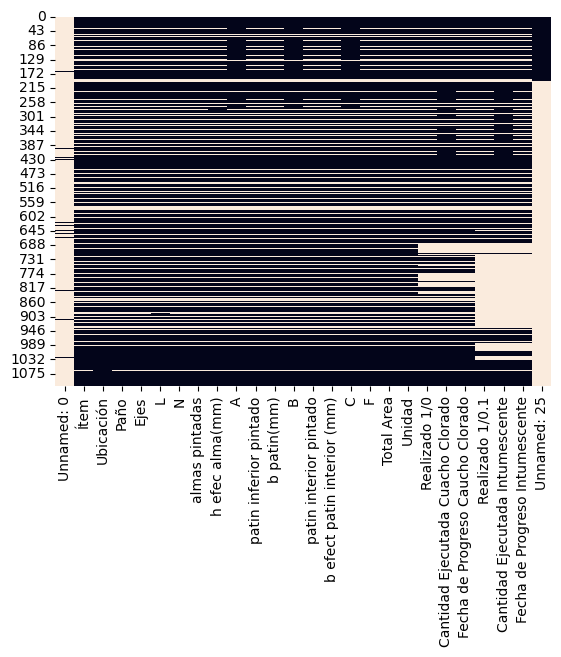

In [121]:
## Heatmap that represents how was made the dataset
sns.heatmap(paint_df.isnull(),cbar=False)

In [122]:
paint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         44 non-null     object        
 1   Ítem                               874 non-null    object        
 2   Ubicación                          883 non-null    object        
 3   Paño                               874 non-null    float64       
 4   Ejes                               874 non-null    object        
 5   L                                  875 non-null    object        
 6   N                                  874 non-null    float64       
 7   almas pintadas                     872 non-null    float64       
 8   h efec alma(mm)                    873 non-null    object        
 9   A                                  906 non-null    float64       
 10  patin inferior pintado             8

In [123]:
paint_df.drop(paint_df.columns[[0,3,4,9,12,15,16,18,19,22,25]],axis=1, inplace=True)


In [124]:
paint_df.isnull().sum()

Ítem                                 239
Ubicación                            230
L                                    238
N                                    239
almas pintadas                       241
h efec alma(mm)                      240
patin inferior pintado               241
b patin(mm)                          241
patin interior pintado               241
b efect patin interior (mm)          241
Total Area                           239
Cantidad Ejecutada Cuacho Clorado    276
Fecha de Progreso Caucho Clorado     298
Cantidad Ejecutada Intumescente      423
Fecha de Progreso Intumescente       454
dtype: int64

In [125]:
paint_df.dropna(inplace=True)
paint_df.info()
pd.unique(paint_df['L'])

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               657 non-null    object        
 1   Ubicación                          657 non-null    object        
 2   L                                  657 non-null    object        
 3   N                                  657 non-null    float64       
 4   almas pintadas                     657 non-null    float64       
 5   h efec alma(mm)                    657 non-null    object        
 6   patin inferior pintado             657 non-null    float64       
 7   b patin(mm)                        657 non-null    float64       
 8   patin interior pintado             657 non-null    float64       
 9   b efect patin interior (mm)        657 non-null    float64       
 10  Total Area                         657 non

array([3.94, 12.25, 9.3, 1.9, 3.9, 13, 10, 1.55, 15.25, 16, 12.45, 6.3,
       1.91, 1.68, 8.35, 9, 12.4, 1.94, 5.6, 5, 2.8, 5.3, 9.28, 9.25, 8.4,
       9.4, 8.1, 8.33, 8.45, 0.52, 5.17, 5.24, 2.7, 3.3, 3.6, 10.5, 4.6,
       6.35, 12.3, 1.75, 3, 1.2, 3.35, 1.45, 1.6, 2.45, 1.25, 1.7, 12.5,
       8.2, 1.53, 2, 1, 6.45, 3.65, 4.2, 9.2, 5.7, 2.5, 9.55, 4.3, 4.05,
       8.55, 4.1, 5.18, 3.4, 3.7, 0.5, 3.2, 0.75, 3.55, 3.25, 7, 2.9,
       9.75, 12.41, 9.5, 1.8, 4, 12.35, 9.6, 8, 0.6, 7.9, 7.75, 11.5,
       9.15, 1.5, 10.25, 15.2, 9.33, 9.1, 1.3, 5.4, 6.7, 6, 8.5, 4.45,
       7.45, 2.4, 4.15, 9.8, 8.8, 1.05, 6.2, 8.48, 15.4, 1.21],
      dtype=object)

In [126]:
# Turning discrete columns into continous samples
paint_df['L'] = pd.to_numeric(paint_df['L'], errors='coerce')
paint_df['h efec alma(mm)'] = pd.to_numeric(paint_df['h efec alma(mm)'], errors='coerce')

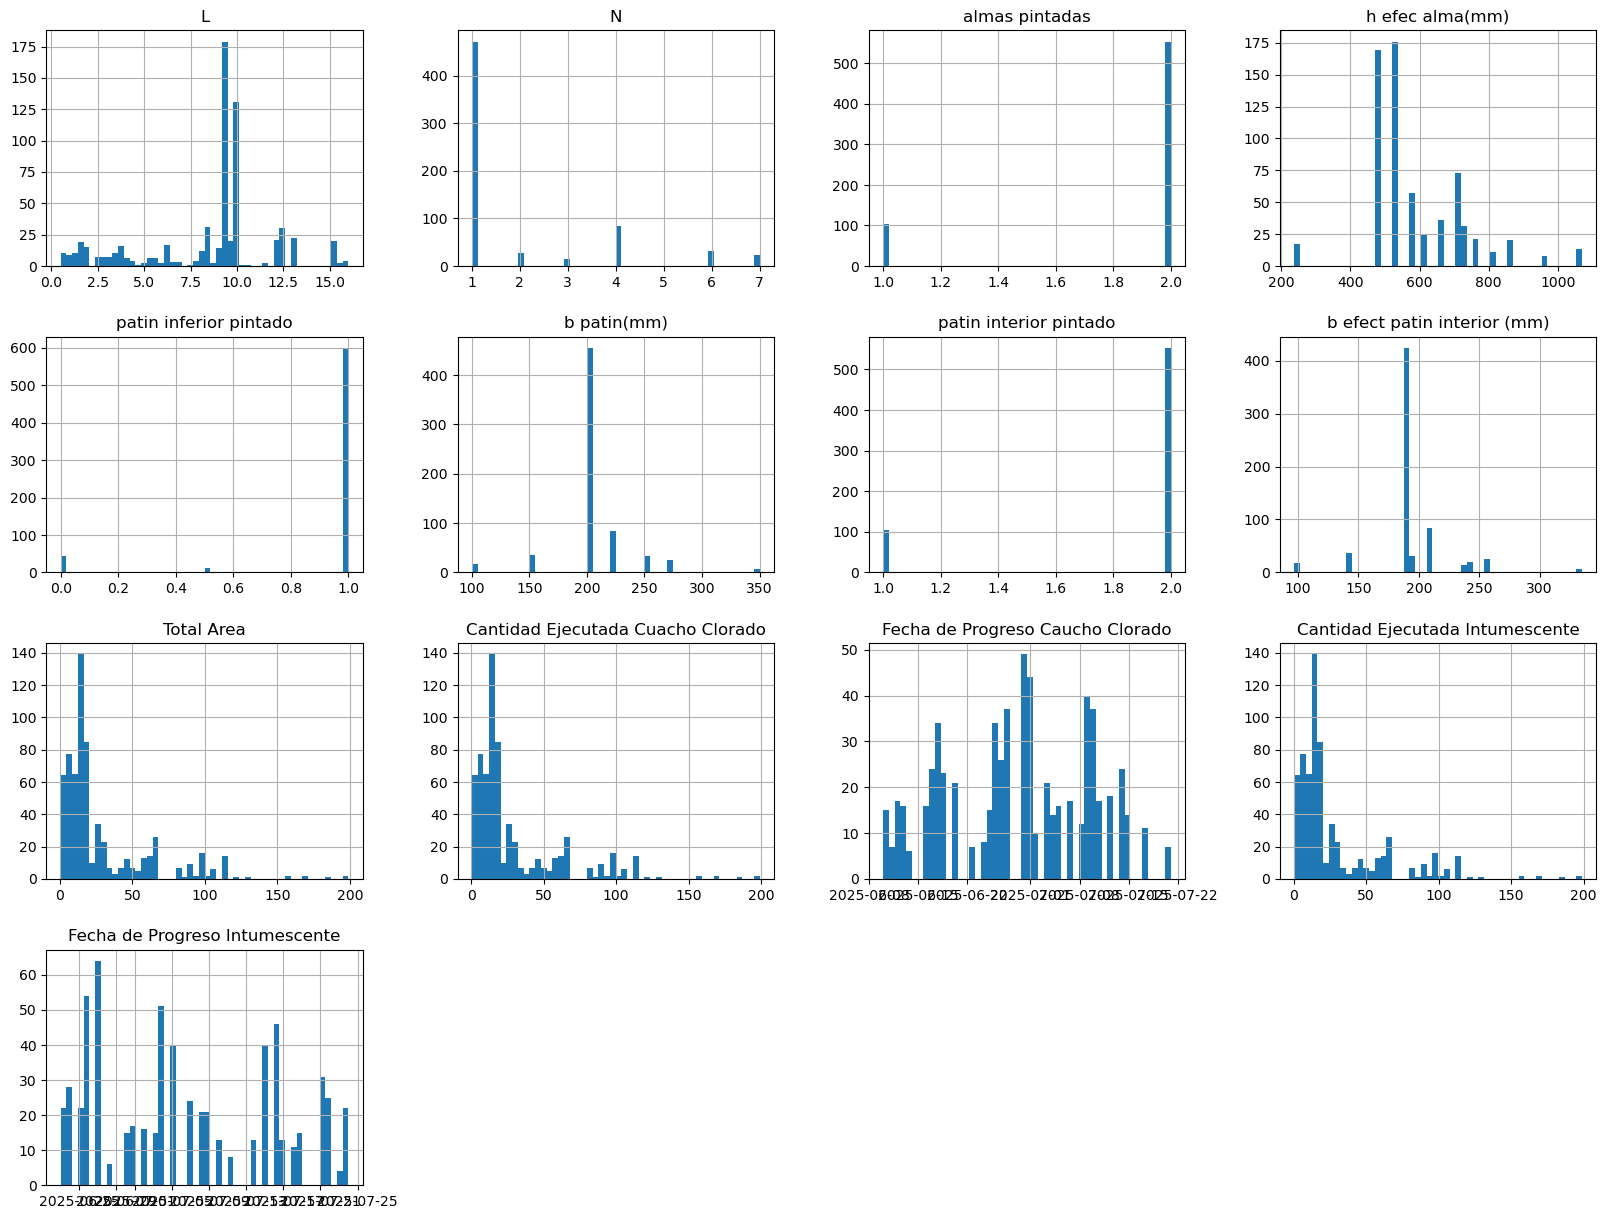

In [129]:
## Some graphic information
paint_df.hist(bins=50 , figsize=(20,15))
plt.show()